![Money](assets/money.png)

# Bank Marketing

## Content

### Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be or not subscribed.

The classification goal is to predict if the client will subscribe a term deposit.

### Libraries
- [pandas](https://pandas.pydata.org) (data manipulation and analysis)
- [NumPy](https://numpy.org) (numerical computing)
- [Matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org) (data visualization)
- [scikit-learn](https://scikit-learn.org) (machine learning)
- [imbalanced-learn](https://imbalanced-learn.org) (classification with imbalanced classes)

### Acknowledgement
This dataset was originally donated to the UCI Machine Learning Repository. You can learn more about past research using the data [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

### Author
[LinkedIn](https://www.linkedin.com/in/brckalo)
[GitHub](https://github.com/brckalo)
[Instagram](https://www.instagram.com/brckalo_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("data/bank_marketing_dataset.csv",sep=";")

In [3]:
df = df.rename(columns=str.lower)

for column in df.select_dtypes(include="object").columns.tolist():
    df[column] = df[column].apply(lambda x: x.lower()) 

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
categorical_features = df.select_dtypes(include="object").drop(columns="y").columns.tolist()
numerical_features = df.select_dtypes(exclude="object").columns.tolist()

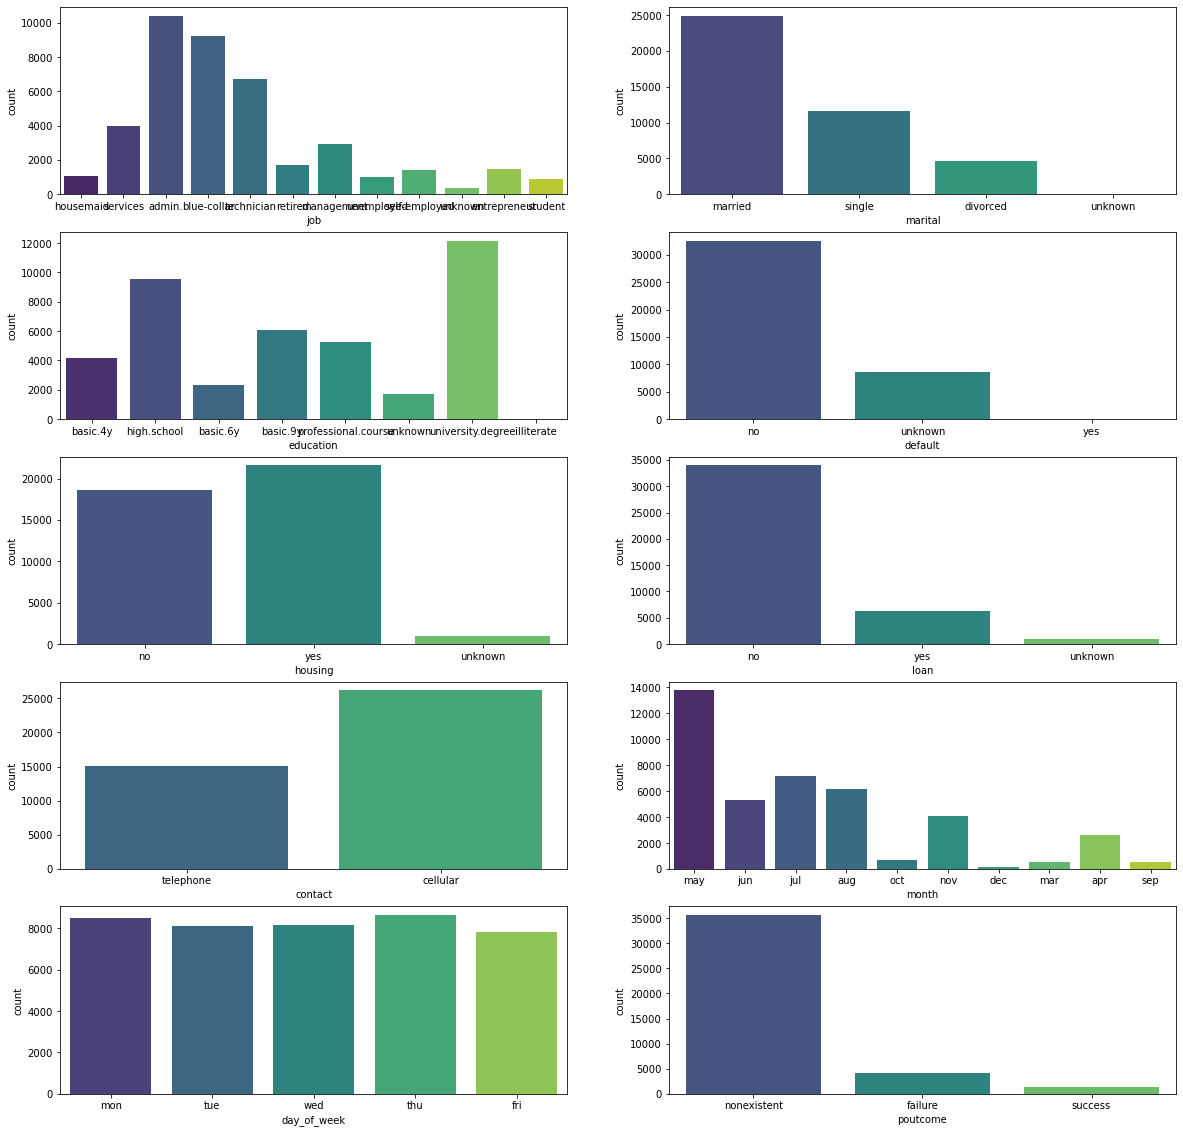

In [9]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(20,20))

for i in range(5):
    for j in range(2):
        sns.countplot(x=categorical_features[2*i+j],data=df,palette="viridis",ax=ax[i,j])

In [10]:
df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

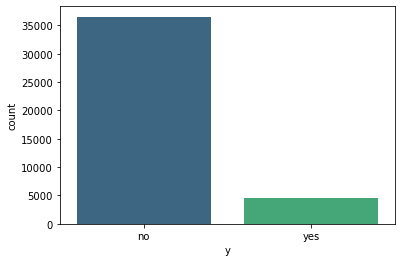

In [12]:
sns.countplot(x="y",data=df,palette="viridis")

plt.show()

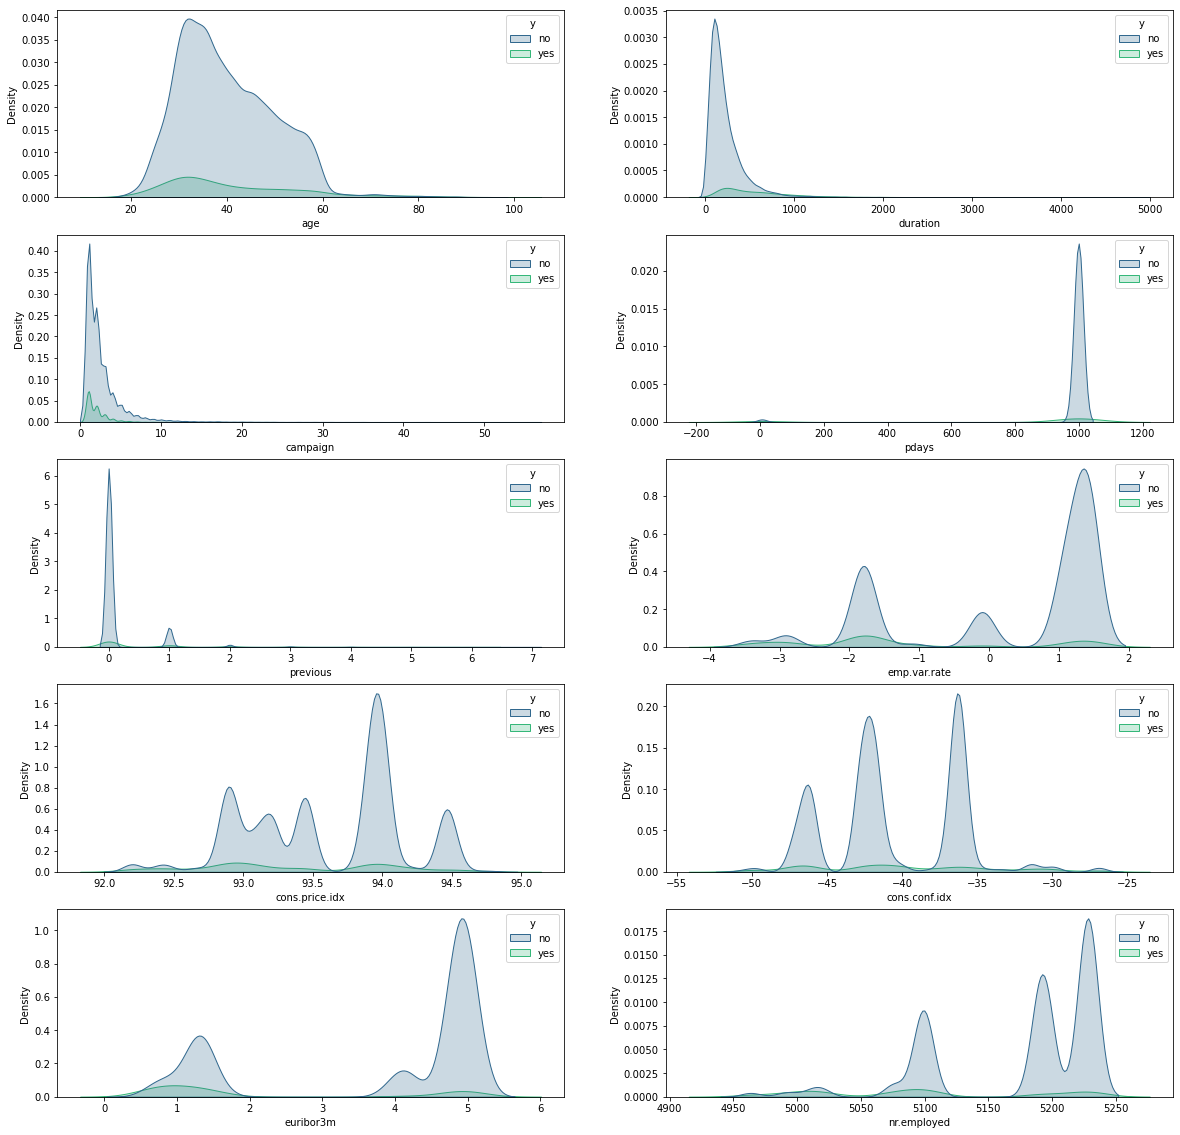

In [13]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(20,20))

for i in range(5):
    for j in range(2):
        sns.kdeplot(x=numerical_features[2*i+j],data=df,hue="y",palette="viridis",fill=True,ax=ax[i,j])

In [14]:
df[categorical_features] = OrdinalEncoder().fit_transform(df[categorical_features])

In [15]:
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

In [16]:
df["y"] = LabelEncoder().fit_transform(df["y"])

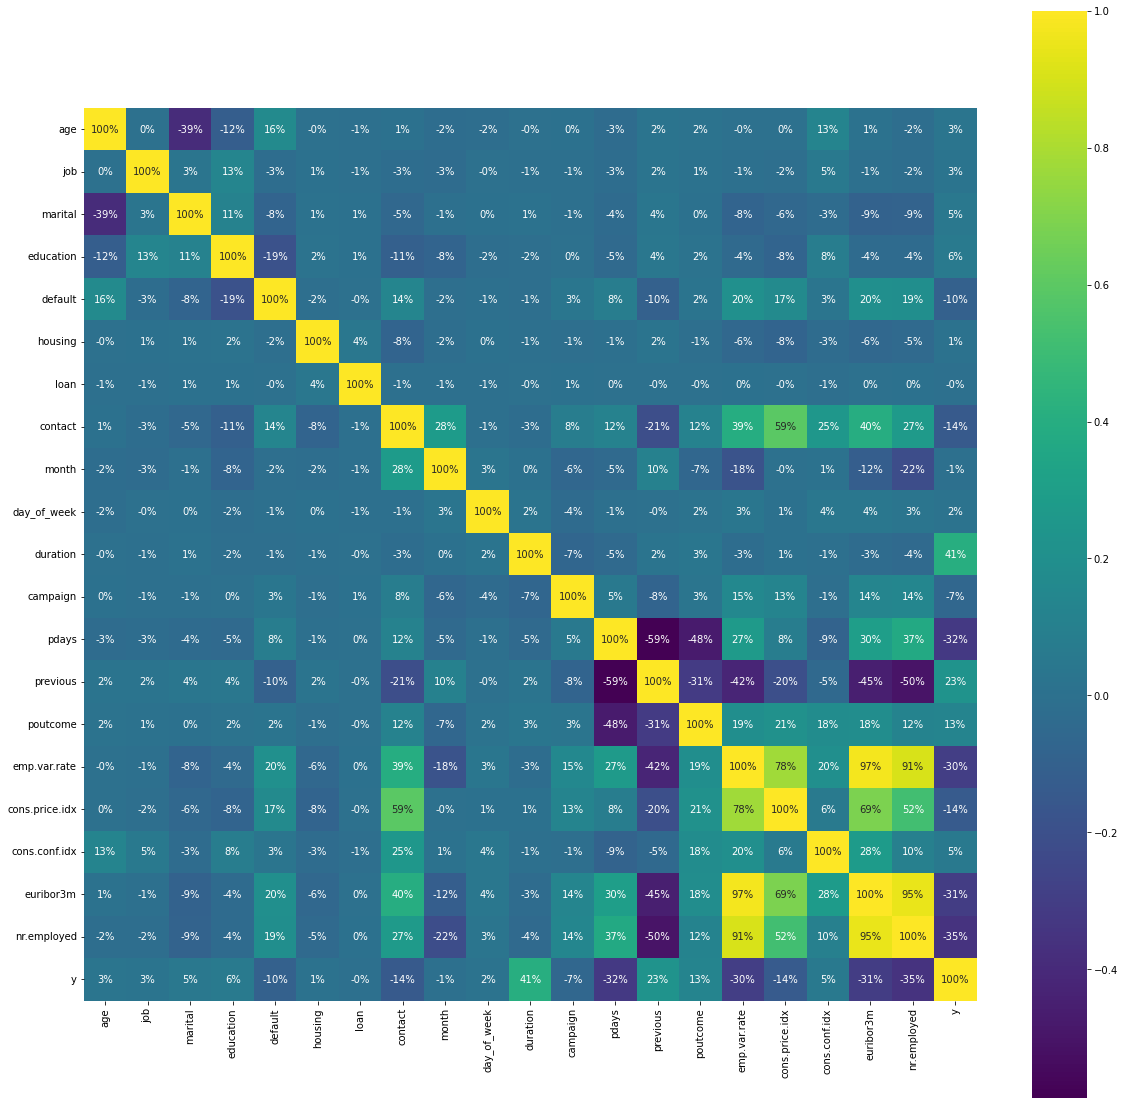

In [17]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),cmap="viridis",annot=True,fmt=".0%",square=True)

plt.show()

In [18]:
X = df[["age","job","marital","education","housing","day_of_week","duration","previous","poutcome","cons.conf.idx"]]
y = df["y"]

In [19]:
X,y = SMOTE().fit_resample(X,y)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((58476, 10), (14620, 10), (58476,), (14620,))

In [22]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [23]:
cv = StratifiedKFold(n_splits=10)

In [24]:
model = {
    "classifier": None,
    "score": 0.0,
    "params": {},
    "grid_search": None
}

In [25]:
estimation_stats = []

for c in classifiers:
    estimation = cross_validate(
        classifiers[c],
        X_train,
        y_train,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1,
        return_estimator=True
    )
    
    estimation_stats.append([c,np.amin(estimation["test_score"])])
    
    if np.amin(estimation["test_score"]) >= model["score"]:
        model = {
            "classifier": estimation["estimator"][-1],
            "score": np.amin(estimation["test_score"])
        }

pd.DataFrame(data=estimation_stats,columns=["estimator","score"])

,estimator,score
0,LogisticRegression,0.787107
1,KNeighborsClassifier,0.909526
2,DecisionTreeClassifier,0.913118


In [26]:
grid_params = {
    "LogisticRegression": {
        "C": [100,10,1.0,0.1,0.01]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [1,3,5,7,9],
        "weights": ["uniform","distance"],
        "metric": ["euclidean","manhattan","chebyshev"]
    },
    "DecisionTreeClassifier": {
        "max_features": ["sqrt","log2"]
    }
}

In [27]:
estimation_stats = []

for c in classifiers:
    grid_search = GridSearchCV(classifiers[c],grid_params[c],scoring="accuracy",n_jobs=-1,cv=cv)
    
    estimation = grid_search.fit(X_train,y_train)
    
    estimation_stats.append([c,estimation.best_score_])
    
    if estimation.best_score_ >= model["score"]:
        model = {
            "classifier": c,
            "score": estimation.best_score_,
            "params": estimation.best_params_,
            "grid_search": grid_search
        }

pd.DataFrame(data=estimation_stats,columns=["estimator","score"])

,estimator,score
0,LogisticRegression,0.793625
1,KNeighborsClassifier,0.951365
2,DecisionTreeClassifier,0.913007


In [28]:
print("model: %s" % model["classifier"])
print("score: %s" % model["score"])
print("param: %s" % model["params"])

model: KNeighborsClassifier
score: 0.9513646316688881
param: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [29]:
y_pred = model["grid_search"].predict(X_test)

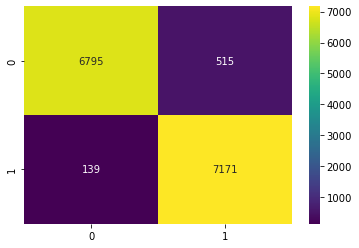

In [30]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),cmap="viridis",annot=True,fmt="g")

plt.show()

In [31]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7310
           1       0.93      0.98      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620

